# The lattice of torsion classes

This is a manual of [tors_lattice.py](https://github.com/haruhisa-enomoto/tors-lattice), a module for [SageMath](https://www.sagemath.org/) which can deal with the lattice of torsion classes of a $\tau$-tilting finite algebra and construct various objects from it.

### Author
[Haruhisa Enomoto](http://haruhisa-enomoto.github.io/)

### References

- [AP] S. Asai, C. Pfeifer,
  *Wide subcategories and lattices of torsion classes*,
  arXiv:1905.01148.

- [BTZ] E. Barnard, G. Todorov, S. Zhu,
  *Dynamical combinatorics and torsion classes*,
  J. Pure Appl. Algebra 225 (2021), no. 9, 106642.

- [DIJ] L. Demonet, O. Iyama, G. Jasso,
  $\tau$-tilting finite algebras, bricks, and g-vectors,
  Int. Math. Res. Not. IMRN 3, 852--892 (2019).
  
- [DIRRT] L. Demonet, O. Iyama, N. Reading, I. Reiten, H. Thomas,
  *Lattice theory of torsion classes*, arXiv:1711.01785.

- [E] H. Enomoto,
  *Computing various objects of an algebra from the poset of torsion classes*,
  in preparation.
  
- [ES] H. Enomoto, A. Sakai,
  *ICE-closed subcategories and wide $\tau$-tilting modules*,
  to appear in Math. Z.
  
### Requirements
[SageMath](https://www.sagemath.org/) version 9.x or later (since this code is based on Python 3)

### Overview

This module mainly consists of the following.

- [class `FiniteTorsLattice`](#class-FiniteTorsLattice):  
a class for lattices of torsion classes over $\tau$-tilting fintie artin algebras, together with various methods computing objects naturally arising in the representation theory of algebras.
This is a subclass of a SageMath class [`FiniteLatticePoset`](https://doc.sagemath.org/html/en/reference/combinat/sage/combinat/posets/lattices.html#sage.combinat.posets.lattices.FiniteLatticePoset).
- [function `TorsLattice`](#TorsLattice%28data-=-None,-*args,-**kwargs%29):  
a function to create an instance of `FiniteTorsLattice`. You'll always use this function to use this module.

### Table of contents

- [Convention](#Convention)
- [How it works](#How-it-works)
- [Usage](#Usage): How to use this module
- [Functions](#Functions): fuctions defined in this module:

| Function Name | Description |
|- | - | 
|[myshow](#myshow%28poset,-label-=-True,-vertex_size-=-100,-**kwargs%29) | A variant of show method, which looks nicer for the Hasse diagram of a poset.|
|[TorsLattice](#TorsLattice%28data-=-None,-*args,-**kwargs%29) |Construct a lattice of torsion classes from various forms of input data|

- [A class `FiniteTorsLattice` and its methods](#A-class-FiniteTorsLattice-and-its-methods)
- [class FiniteTorsLattice](#class-FiniteTorsLattice)
- [Working example](#Working-example): gives two examples which are used throughout this manual
- [Basic Methods](#Basic-Methods)

| Method Name | Description |
|-|-|
| [zero](#zero%28self%29) | Return the smallest torsion class $0$|
| [whole](#whole%28self%29) | Return the largest torsion class, i.e. the whole abelian category |
| [all_itvs](#all_itvs%28self%29) | Return the set of all intervals in the torsion poset |
| [simples](#simples%28self%29) | Return the set of simple torsion classes |
| [all_bricks](#all_bricks%28self%29) | Return the set of all bricks represented by join-irreducibles|
|[kappa](#kappa%28self,-T%29)| Return the (extended) kappa map of an element |
|[bricks_in_tors](#bricks_in_tors%28self,-T%29) | Return the set of bricks contained in a torsion class |
|[bricks_in_torf](#bricks_in_torf%28self,-T%29) | Return the set of bricks contained in a torsion-free class $T^\perp$ |
|[bricks](#bricks%28self,-itv,-*,-check-=-True%29)| Return the set of bricks in the heart of an interval of torsion classes |
|[label](#label%28self,-itv,-*,-check-=-True%29)| Return the brick label of an Hasse arrow in the lattice of torsion classes |
|[plus](#plus%28self,-U%29)|Return the join of all Hasse arrows ending at `U`|
|[minus](#minus%28self,-T%29) | Return the meet of all Hasse arrows starting at `T`|

- [Methods about intevals](#Methods-about-intevals)

| Method Name | Description |
|-|-|
|[is_wide_itv](#is_wide_itv%28self,-itv,-*,-check-=-True%29) | Return `True` if `itv` is a wide interval, and `False` otherwise
|[is_ice_itv](#is_ice_itv%28self,-itv,-*,-check-=-True%29) | Return ``True`` if ``itv`` is an ICE interval, and ``False`` otherwise
|[is_ike_itv](#is_ike_itv%28self,-itv,-*,-check-=-True%29) | Return ``True`` if ``itv`` is an IKE interval, and ``False`` otherwise
|[itv_lequal](#itv_lequal%28self,-itv1,-itv2%29) | Return whether the heart of ``itv1`` is contained in that of ``itv2``

- [Particular subcategories](#Particular-subcategories)

| Method Name | Description |
|-|-|
| [wide_simples](#wide_simples%28self,-itv%29) |Return the set of simple objects in a wide subcategory corresponding to `itv`
|[wide_lequal](#wide_lequal%28self,-U,-T%29) | Compare two wide subcategories corresponding to two torsion classes
|[wide_lattice](#wide_lattice%28self%29) | Return the lattice of wide subcategories
|[ice_lattice](#ice_lattice%28self%29) | Return the lattice of ICE-closed subcategories
|[ike_lattice](#ike_lattice%28self%29) | Return the lattice of IKE-closed subcategories
|[heart_poset](#heart_poset%28self%29) | Return the poset of torsion hearts ordered by inclusion

- [$\tau$-tilting theory](#$\tau$-tilting-theory)

| Method Name | Description |
|-|-|
|[indec_tau_rigid](#indec_tau_rigid%28self%29) | Return the set of indecomposable $\tau$-rigid modules, represented by join-irreducible torsion classes.
|[has_tau_rigid_summand](#has_tau_rigid_summand%28self,-M,-*,-check-=-True%29) | Return the set of $\tau$-tilting pairs which has ``M`` as a $\tau$-rigid summand
|[has_support_summand](#has_support_summand%28self,-S,-*,-check-=-True%29) |Return the set of $\tau$-tilting pairs which have the projective cover of ``S`` as a support summand
|[projectives](#projectives%28self,-T%29) | Return the set of indecomposable Ext-projectives of ``T`` represented by join-irreducibles
|[composition_factors](#composition_factors%28self,-T%29) | Return the set of composition factors of all modules in `T`
|[is_sincere](#is_sincere%28self,-T%29) | Return ``True`` if ``T`` is a sincere torsion class and ``False`` otherwise
|[tau_rigid_pair_summand](#tau_rigid_pair_summand%28self,-T%29) | Return the set of indecomposable $\tau$-rigid pairs which are direct summands of ``T``
|[s_tau_tilt_complex](#s_tau_tilt_complex%28self%29) | Return the support $\tau$-tilting simplicial complex of the algebra
|[positive_tau_tilt_complex](#positive_tau_tilt_complex%28self%29) | Return the positive  $\tau$-tilting simplicial complex of the algebra
|[number_of_projs](#number_of_projs%28self,-arg%29) | Return the number of indecomposable Ext-projective objects in a given subcategory

### Convention

- For simplicity, we assume that we consider the lattice of torsion classes over some $\tau$-tilting finite artin $R$-algebra over a commutative artinian ring $R$. An artin algebra is **$\tau$-tilting finite** if there're only finitely many torsion classes.
Though, all methods except those below [$\tau$-tilting theory](#$\tau$-tilting-theory) work also for the lattice of torsion classes of some abelian length category with finitely many torsion classes.

- *We don't check that a given lattice is actually the lattice of torsion classes over some artin algebra*, because maybe there's no characterization known. We only require that a given lattice is a finite semi-distributive lattice.

- **The direction of Hasse arrows in displayed in SageMath is opposite to the representation-threorist's convention**, that is,
in SageMath, an arrow $p \to q$ is displayed if $p$ is covered by $q$, thus $p < q$. However, in the description of functions and methods below, we follow the representation-theorist's convention.

### How it works

We use the notion of *torsion hearts* and a *bijection between bricks and join-irreducible torsion classes*.
The details will be explained in my ongoing paper [E].

- For two torsion classes $\mathcal{U}$ and $\mathcal{T}$ with $\mathcal{U} \subseteq \mathcal{T}$, the *heart* of an interval $[\mathcal{U}, \mathcal{T}]$ is defined to be the subcategory
$\mathcal{H}_{[\mathcal{U},\mathcal{T}]} := \mathcal{T} \cap \mathcal{U}^\perp$, where $\mathcal{U}^\perp$ is the torsion-free class corresponding to $\mathcal{U}$. We call a subcategory of an abelian category a *torsion heart* if it is a heart of some interval of torsion classes.  
- It is known that every *ICE-closed subcategory* (subcategory closed under taking images, cokernels, and extensions) and every *IKE-closed subcategory* (subcategory closed under taking images, kernels, and extensions) is a torsion heart [ES]. In particular, every wide subcategory is also a torsion heart.
- There is a lattice-theoretic characterization of intervals of torsion classes whose hearts are wide [AP], ICE-closed, or IKE-closed [ES]. Thus there's a surjective map from these intervals to the poset of wide or ICE-closed subcategories.

- On the other hand, a torsion heart can be recovered from the set of bricks contained in it [DIRRT]. Thus, we can construct the poset of torsion hearts (or its subposet such as the poset of wide subcategories) if we can combinatorially model the set of bricks contained in a torsion heart.
- This can be achieved by using the bijection between bricks and join-irreducible torsion classes in [DIRRT] and the kappa map in [BTZ].

# Usage
In this manual, I assume that you are using SageMath notebook (but you can use this module by other ways, e.g. using SageMath shell or importing it in your sage code).

So first load it in the notebook.

In [1]:
load("tors_lattice.py")

## Functions

### `myshow(poset, label = True, vertex_size = 100, **kwargs)`

A variant of ``show`` method, which looks nicer for the Hasse diagram of a poset.

Note that **the direction of Hasse arrows in SageMath is opposite to
the representation-threorist's convention**, that is,
there is an arrow $p \to q$ if $p$ is covered by $q$.

INPUT:

- ``poset`` -- an object which has ``show`` method,
  which we expect to be an instance of
  a SageMath class [`FinitePosets`](https://doc.sagemath.org/html/en/reference/combinat/sage/combinat/posets/posets.html#sage.combinat.posets.posets.FinitePoset)

- ``label`` -- a Boolean (default: ``True``), whether to label vertices

- ``vertex_size`` -- the size of vertices (default: 100)

- ``**kwargs`` -- keyword arguments that will passed down to `poset.show()`, see a SageMath method [FinitePoset.show](https://doc.sagemath.org/html/en/reference/combinat/sage/combinat/posets/posets.html#sage.combinat.posets.posets.FinitePoset.show)

EXAMPLES:

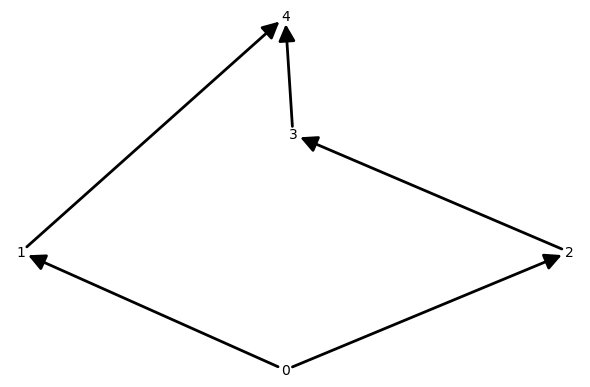

In [2]:
P = posets.PentagonPoset()
myshow(P)

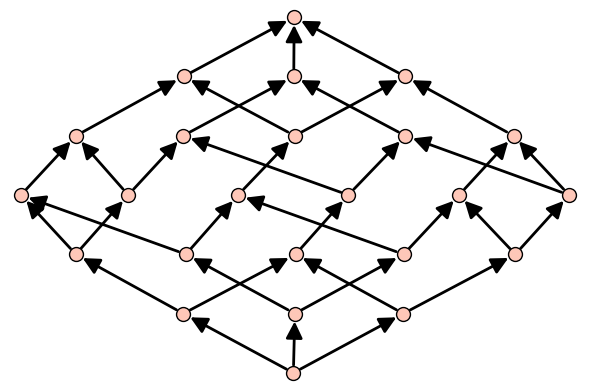

In [3]:
P = WeylGroup("A3").weak_poset()
myshow(P, label=False)

### `TorsLattice(data = None, *args, **kwargs)`

Construct a lattice of torsion classes from various forms of input data

This raises an error if the constructed lattice is not semidistributive,
since the lattice of torsion classes is semidistributive.

INPUT:

- ``data``, ``*args``, ``**kwargs`` -- data and options that will
  be passed down to a SageMath function [`LatticePoset`](https://doc.sagemath.org/html/en/reference/combinat/sage/combinat/posets/lattices.html#sage.combinat.posets.lattices.LatticePoset) to construct a poset that is
  also a lattice.

OUTPUT:

An instance of a class [`FiniteTorsLattice`](#class-FiniteTorsLattice)

EXAMPLES:

An input can be either poset (or lattice) itself or data from which we can construct a poset ([`Poset`](https://doc.sagemath.org/html/en/reference/combinat/sage/combinat/posets/posets.html#sage.combinat.posets.posets.Poset) for how to construct posets).

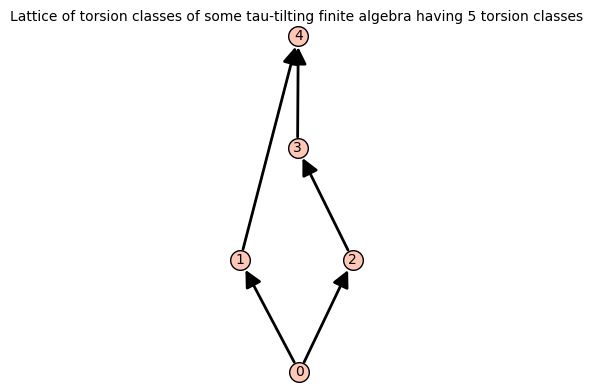

In [4]:
tors = TorsLattice(posets.PentagonPoset())
tors

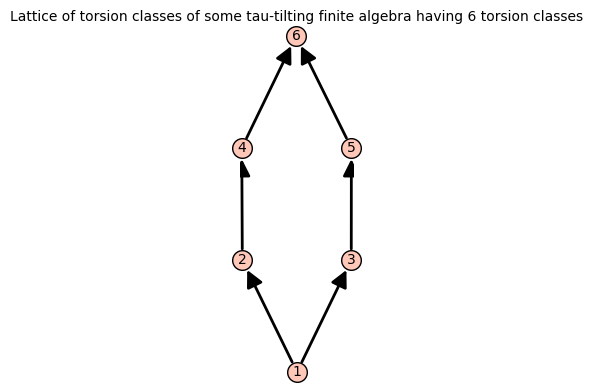

In [5]:
TorsLattice(([1,2,3,4,5,6], [[1,2],[1,3],[2,4],[3,5],[4,6],[5,6]]))

In [6]:
W = WeylGroup("D4")
tors = TorsLattice(W.weak_poset())
tors

Lattice of torsion classes of some tau-tilting finite algebra having 192 torsion classes (use the .plot() method to plot)

## A class `FiniteTorsLattice` and its methods

### class `FiniteTorsLattice`

A subclass of a SageMath class [`FiniteLatticePoset`](https://doc.sagemath.org/html/en/reference/combinat/sage/combinat/posets/lattices.html#sage.combinat.posets.lattices.FiniteLatticePoset),
which we regard as the class of lattices of all torsion classes
of an abelian length category.
The argument passed to FiniteTorsLattice is assumed to be
a finite semidistributive lattice.

To construct an instance of [`FiniteTorsLattice`](#class-FiniteTorsLattice), we use a function [`TorsLattice`](#TorsLattice%28data-=-None,-*args,-**kwargs%29).

### Working example
To illustrate various methods, we'll use the following two lattices:
1. `tors1` is the lattice of torsion classes of the path algebra of an $A_2$ quiver.
1. `tors2` is the lattice of torsion classes of the preprojective algebra of type $A_3$.

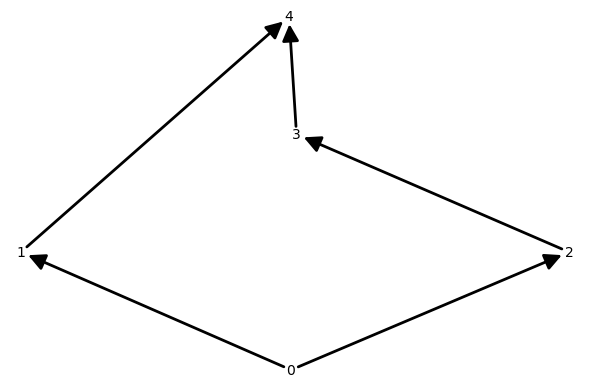

In [7]:
tors1 = TorsLattice(posets.PentagonPoset())
myshow(tors1)

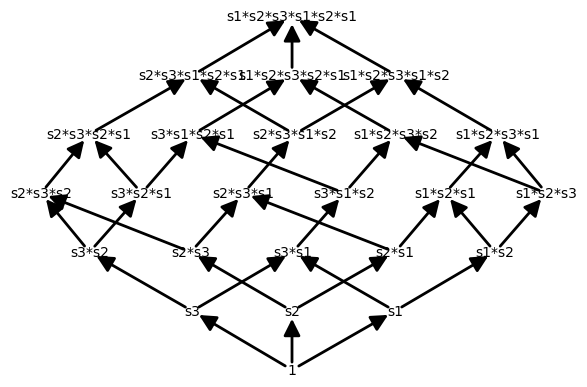

In [8]:
W = WeylGroup("A3", prefix = "s")
s = W.simple_reflections()
tors2 = TorsLattice(W.weak_poset())
myshow(tors2)

### Basic Methods

### `zero(self)`
Return the smallest torsion class $0$

EXAMPLES:

In [9]:
tors1.zero()

0

In [10]:
tors2.zero() # 1 is the unit element of the Weyl group, hence the bottom element

1

### `whole(self)`
Return the largest torsion class, i.e. the whole abelian category

EXAMPLES:

In [11]:
tors1.whole()

4

In [12]:
tors2.whole()

s1*s2*s3*s1*s2*s1

### `all_itvs(self)`
Return the set of all intervals in the torsion poset

EXAMPLES:

In [13]:
tors1.all_itvs()

{(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 1),
 (1, 4),
 (2, 2),
 (2, 3),
 (2, 4),
 (3, 3),
 (3, 4),
 (4, 4)}

### `simples(self)`

Return the set of simple torsion classes.

Here a **simple torsion class** is a Serre subcategory which contains
exactly one simple module, or equivalently,
torsion classes from which there are arrows to $0$.
We can use this to represent the list of simple modules.

EXAMPLES:

In [14]:
tors1.simples()

{1, 2}

In [15]:
tors2.simples()

{s1, s3, s2}

### `all_bricks(self)`

Return the set of all bricks represented by join-irreducibles

We always use join-irreducible torsion classes
to represent bricks by a bijection in [DIRRT].

EXAMPLES:

In [16]:
tors1.all_bricks()

{1, 2, 3}

In [17]:
len(tors2.all_bricks()) # the number of all bricks

11

### `kappa(self, T)`

Return the (extended) kappa map of ``T``

This is computed as follows:
Let $B_1,\dots, B_k$ be brick labels of all arrows starting from $T$.
Then $T$ is the join of $T(B_1), \dots, T(B_k)$,
where $T(B)$ is the smallest torsion classes containing $B$.
The kappa map $\kappa(T)$ is defined to be the intersection of
$^\perp B_1, \dots, {}^\perp B_k$.
This operation maps the canonical join representation
to the canonical meet representation.
See [BTZ] for the detail.

INPUT:

- ``T`` -- an element (torsion class) of ``self``

OUTPUT:

an element of ``self``

EXAMPLES:

In [18]:
{ T: tors1.kappa(T) for T in tors1 }

{0: 4, 1: 3, 2: 1, 3: 2, 4: 0}

### `bricks_in_tors(self, T)`

Return the set of bricks contained in a torsion class ``T``

INPUT:

- ``T`` -- an element (torsion class) of ``self``

OUTPUT:

the frozenset of bricks (represented by join-irreducibles in ``self``)
contained in ``T``

EXAMPLES:

In [19]:
tors2.bricks_in_tors(tors2(s[1]*s[2]*s[1]))

frozenset({s2*s1, s1, s2, s1*s2})

### `bricks_in_torf(self, T)`

Return the set of bricks contained in a torsion-free class $T^\perp$

INPUT:

- ``T`` -- an element (torsion class) of ``self``

OUTPUT:

the frozenset of bricks (represented by join-irreducibles in ``self``)
contained in the torsion-free class corresponding to ``T``,
i.e. $T^\perp$

EXAMPLES:

In [20]:
tors2.bricks_in_torf(s[1]*s[2]*s[3])

frozenset({s3, s2, s2*s3, s3*s2})

### `bricks(self, itv, *, check = True)`

Return the set of bricks in the heart of an interval of torsion classes

For two torsion classes $U,T$ with $U \subseteq T$,
its heart is $T \cap U^\perp$ (see [ES]).

INPUT:

- ``itv`` -- a pair (tuple) of torsion classes

- ``check`` -- a Boolean (default: ``True``),
  whether to check ``itv`` is actually an interval

OUTPUT:

the frozenset of bricks (represented by join-irreducibles)
contained in the heart of the given interval

EXAMPLES:

In [21]:
tors1.bricks((2,4))

frozenset({1, 3})

### `label(self, itv, *, check = True)`

Return the brick label of an Hasse arrow in the lattice of torsion classes

For a Hasse arrow $T \to U$, its label is a unique brick
contained in $T \cap U^\perp$ [DIRRT].

INPUT:

- ``itv`` -- a pair (tuple) of torsion classes (U,T),
  which we expect that U is covered by T

- ``check`` -- a Boolean (default: ``True``),
  whether to check ``itv`` actually gives a covering relation
  
EXAMPLES:

The following are the Hasse quiver of `tors1` and `tors2` together with its brick (join-irreducible) labels

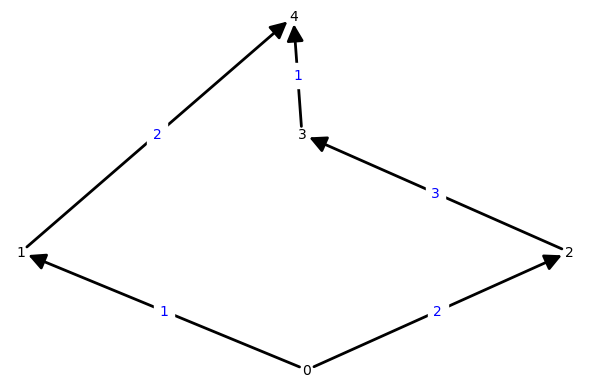

In [22]:
myshow(tors1, cover_labels=lambda U,T: tors1.label((U,T)))

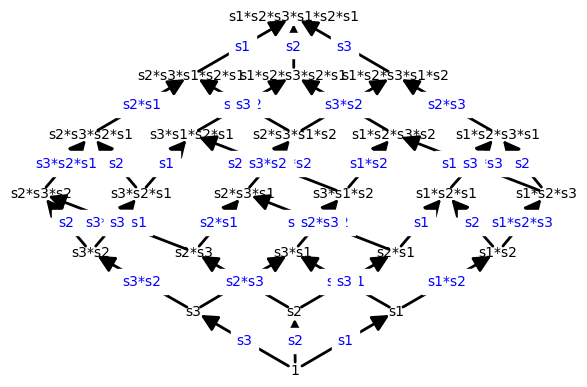

In [23]:
myshow(tors2, cover_labels=lambda U,T: tors2.label((U,T)))

### `plus(self, U)`

Return the join of all Hasse arrows ending at ``U``

For a torsion class $U$, its plus $U^{+}$ satisfies that
$[U,U^{+}]$ is a wide interval which is the largest wide interval
of the form $[U,T]$.

INPUT:

- ``U`` -- an element (torsion class) of ``self``

EXAMPLES:

In [24]:
tors2.plus(s[1])

s1*s2*s3*s2

In [25]:
tors2.is_wide_itv((s[1], s[1]*s[2]*s[3]*s[2]))

True

### `minus(self, T)`

Return the meet of all Hasse arrows starting at ``T``

For a torsion class $T$, its minus $T^{-}$ satisfies that
$[T^{-},T]$ is a wide interval which is the largest wide interval
of the form $[U,T]$.

INPUT:

- ``T`` -- an element (torsion class) of ``self``

EXAMPLES:

In [26]:
tors2.minus(tors2.whole())

1

### Methods about intevals

### `is_wide_itv(self, itv, *, check = True)`

Return ``True`` if ``itv`` is a wide interval, and ``False`` otherwise

An interval $[U,T]$ is a wide interval if its heart
$T \cap U^\perp$ is a wide subcategory.
This method uses a characterization of wide intervals
given in [AP].

INPUT:

- ``itv`` -- a pair (tuple) of torsion classes,
  which is expected to be an interval

- ``check`` -- a Boolean (default: ``True``),
  whether to check ``itv`` is actually an interval

EXAMPLES:

In [27]:
tors1.is_wide_itv((2,3))

True

### `is_ice_itv(self, itv, *, check = True)`

Return ``True`` if ``itv`` is an ICE interval, and ``False`` otherwise

An interval $[U,T]$ is a wide interval if its heart
$T \cap U^\perp$ is an ICE-closed subcategory, that is,
closed under taking images, cokernels, and extensions.
This method uses a characterization of ICE intervals
given in [ES].

INPUT:

- ``itv`` -- a pair (tuple) of torsion classes,
  which is expected to be an interval

- ``check`` -- a Boolean (default: ``True``),
  whether to check ``itv`` is actually an interval

EXAMPLES:

In [28]:
tors2.is_ice_itv((s[2]*s[1],s[2]*s[1]*s[2]*s[3]))

True

### `is_ike_itv(self, itv, *, check = True)`

Return ``True`` if ``itv`` is an IKE interval, and ``False`` otherwise

An interval $[U,T]$ is a wide interval if its heart
$T \cap U^\perp$ is an IKE-closed subcategory, that is,
closed under taking images, kernels, and extensions.
This function is just a dual of :func:`is_ice_itv`.

INPUT:

- ``itv`` -- a pair (tuple) of torsion classes,
  which is expected to be an interval

- ``check`` -- a Boolean (default: ``True``),
  whether to check ``itv`` is actually an interval

EXAMPLES:

In [29]:
tors1.is_ike_itv((2,4))

True

### `itv_lequal(self, itv1, itv2)`

Return whether the heart of ``itv1`` is contained in that of ``itv2``

The heart of an interval $[U,T]$ is a subcategory $T \cap U^\perp$.
By [DIRRT], the heart is recovered from bricks contained in it,
hence this function compare the sets of bricks in two hearts.

INPUT:

- ``itv1``, ``itv2`` -- pairs (tuples) of torsion classes,
  which are assumed to be intervals

OUTPUT:

``True`` if the heart of ``itv1`` is contained in that of ``itv2``,
and ``False`` otherwise.

EXAMPLES:

In [30]:
tors1.itv_lequal((2,3),(0,3))

True

### Particular subcategories

### `wide_simples(self, itv)`

Return the set of simple objects in a wide subcategory corresponding to ``itv``

INPUT:

- ``itv`` -- a pair (tuple) of torsion class, which we assume is a wide interval

OUTPUT:

the set of simple objects (bricks represented by join-irreducibles) of a wide subcategory which is the heart of ``itv``

EXAMPLES:

In [31]:
tors1.wide_simples((2,3))

{3}

In [32]:
tors2.wide_simples((s[2]*s[1], tors2.plus(s[2]*s[1])))

{s1, s2*s3}

### `wide_lequal(self, U, T)`

Compare two wide subcategories corresponding to two torsion classes

If there are only finitely many torsion classes, then there is a bijection
between the set of torsion classes and the set of wide subcategories
by Marks-Stovicek for finite-dimensional algebras and [E] for an abelian length category, see also [AP].
Write $W_L(T)$ for the wide subcategory corresponding to $T$,
which is a filtration closure of the brick labels of all Hasse arrows starting at $T$.
Then the smallest torsion class containing $W_L(T)$ is $T$.
This method returns whether $W_L(U) \subseteq W_L(T)$.

INPUT:

- ``U``, ``T`` -- elements of ``self`` (torsion classes)

OUTPUT:

``True`` if $W_L(U)$ is contained in $W_L(T)$, and ``False`` otherwise

REFERENCES:

- [MS] F. Marks, J. Stovicek,
   Torsion classes, wide subcategories and localisations,
   Bull. London Math. Soc. 49 (2017), Issue 3, 405–416.

- [E] H. Enomoto,
   Monobrick, a uniform approach to torsion-free classes and wide subcategories,
   arXiv:2005.01626.

EXAMPLES:

In [33]:
tors1.wide_lequal(1,4)

True

### `wide_lattice(self)`

Return the lattice of wide subcategories

The underlying set of this lattice is the same as `self`, and
its partial order is given by [`wide_lequal`](#wide_lequal%28self,-U,-T%29).

OUTPUT:

an instance of a SageMath class [`FiniteLatticePoset`](https://doc.sagemath.org/html/en/reference/combinat/sage/combinat/posets/lattices.html#sage.combinat.posets.lattices.FiniteLatticePoset)

EXAMPLES:

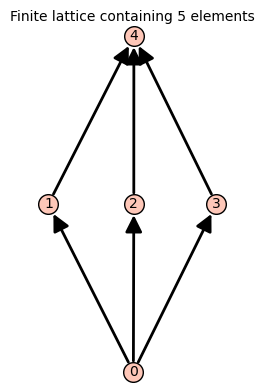

In [34]:
tors1.wide_lattice()

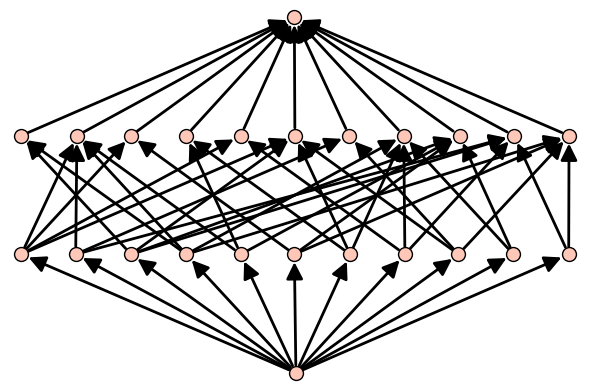

In [35]:
myshow(tors2.wide_lattice(), label = False)

### `ice_lattice(self)`

Return the lattice of ICE-closed subcategories, that is,
subcategories closed under images, cokernels, and extensions.

This lattice is realized as a poset of sets of bricks
(represented by join-irreducibles) contained in ICE-closed subcategories.

OUTPUT:

an instance of a SageMath class [`FiniteLatticePoset`](https://doc.sagemath.org/html/en/reference/combinat/sage/combinat/posets/lattices.html#sage.combinat.posets.lattices.FiniteLatticePoset)

EXAMPLES:

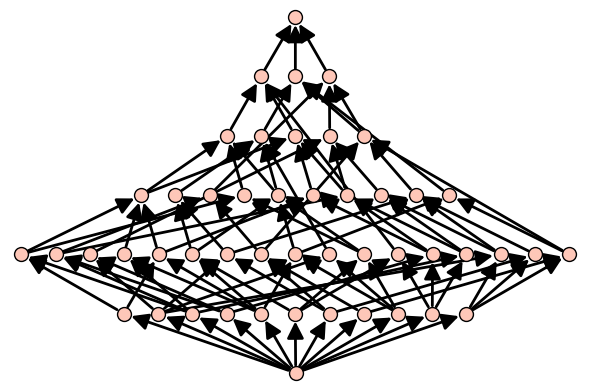

In [37]:
myshow(tors2.ice_lattice(), label=False)

### `ike_lattice(self)`

Return the lattice of IKE-closed subcategories, that is,
subcategories closed under images, kernels, and extensions.

This lattice is realized as a poset of sets of bricks
(represented by join-irreducibles) contained in IKE-closed subcategories.

OUTPUT:

an instance of a SageMath class [`FiniteLatticePoset`](https://doc.sagemath.org/html/en/reference/combinat/sage/combinat/posets/lattices.html#sage.combinat.posets.lattices.FiniteLatticePoset)

EXAMPLES:

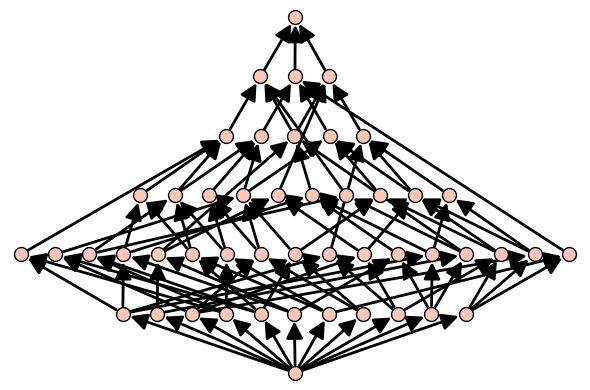

In [38]:
myshow(tors2.ike_lattice(), label = False)

### `heart_poset(self)`

Return the poset of torsion hearts ordered by inclusion

A torsion heart is a subcategory which arises as a heart of some interval
of torsion classes. For example, every wide subcategory, ICE-closed subcategory is
a torsion heart.
This poset is not a lattice in general.

This poset is realized as a poset of sets of bricks
(represented by join-irreducibles) contained in torsion hearts.

OUTPUT:

an instance of a SageMath class [`FinitePoset`](https://doc.sagemath.org/html/en/reference/combinat/sage/combinat/posets/posets.html#sage.combinat.posets.posets.FinitePoset)

EXAMPLES:

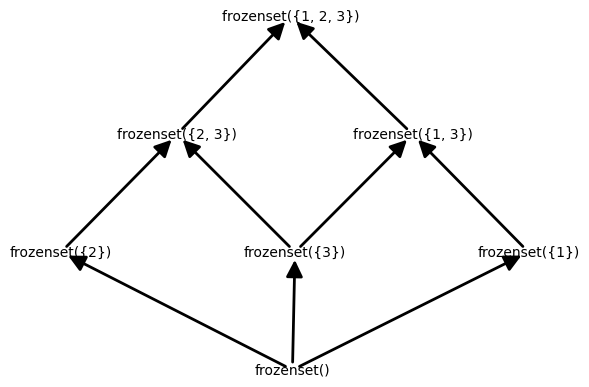

In [39]:
myshow(tors1.heart_poset())

In [40]:
tors2.heart_poset().is_lattice()

False

### $\tau$-tilting theory

In what follows, we often regard an element of `self` as the set of $\tau$-tilting pairs or support $\tau$-tilting modules.
A *$\tau$-rigid pair* $(M,P)$ is a pair such that $M$ is $\tau$-rigid, $P$ is projective and the Hom-set from $P$ to $M$ vanishes. Then a direct sum of $\tau$-rigid pairs can be naturally defined, hence we can speak of indecomposable $\tau$-rigid pairs, $\tau$-rigid-pair-summands, and so on.

A *$\tau$-tilting pair $(M,P)$* is a $\tau$-rigid pair such that the number $|M| + |P|$ is equal to the rank of the algebra. We call $M$ a $\tau$-rigid part, and $P$ a support part. We say that $(M,P)$ has $N$ as a $\tau$-rigid summand if $N$ is a direct summand of $M$, and that $(M,P)$ has $Q$ as a support summand if $Q$ is a direct summand of $P$.

See e.g. [AIR] or [DIRRT] for more details. In particular, the following methods only works for the lattice of torsion classes over artin algebras, and *do not work for the lattice of torsion classes over an arbitrary abelian length category*.

REFERENCES:

- [AIR] T. Adachi, O. Iyama, I. Reiten,
  $\tau$-tilting theory,
  Compos. Math. 150 (2014), no. 3, 415--452.

### `indec_tau_rigid(self)`

Return the set of indecomposable $\tau$-rigid modules,
represented by join-irreducible torsion classes.

For a $\tau$-tilting finite algebra, there is a bijection by [DIJ] between
indecomposable $\tau$-rigid modules and join-irreducible torsion classes.
The correspondence is $T(M) = \mathsf{Fac} M$ for a $\tau$-rigid $M$, and
the unique indecomposable split projective object in $T$
for a join-irreducible torsion class $T$.

Since this is the same as [`all_bricks`](#all_bricks%28self%29),
this function is only needed for the readability reason.
  
EXAMPLES:

In [41]:
tors1.indec_tau_rigid()

{1, 2, 3}

### `has_tau_rigid_summand(self, M, *, check = True)`

Return the set of $\tau$-tilting pairs which has ``M`` as a $\tau$-rigid summand

We consider ``self`` as the set of support $\tau$-tilting pairs.
Then this returns the set of support $\tau$-tilting pairs
which contain $(M,0)$ as a direct summand.
We use join-irreducible torsion classes to represent indecomposable $\tau$-rigid modules.
See [`indec_tau_rigid`](#indec_tau_rigid%28self%29).

INPUT:

- ``M`` -- an element of ``self``, which is expected to be join-irreducible

- ``check`` -- a Boolean (default: ``True``),
  whether to check ``M`` is actually join-irreducible

EXAMPLES:

In [42]:
tors1.has_tau_rigid_summand(1)

{1, 4}

In [43]:
tors2.has_tau_rigid_summand(s[2]*s[3]*s[1]*s[2])

{s2*s3*s1*s2, s1*s2*s3*s1*s2, s2*s3*s1*s2*s1, s1*s2*s3*s1*s2*s1}

### `has_support_summand(self, S, *, check = True)`

Return the set of $\tau$-tilting pairs which have the projective cover of ``S`` as a support summand

We consider ``self`` as the set of support $\tau$-tilting pairs.
Then this returns the set of support $\tau$-tilting pairs
which contain $(0,P)$ as a direct summand,
where $P$ is the projective cover of a simple module ``S``.
We use simple torsion classes to represent a simple module,
hence ``S`` is expected to be a simple torsion class, that is,
a Serre subcategory with one simple module.

INPUT:

- ``S`` -- an element of ``self``, which is expected to be a simple torsion class

- ``check`` -- a Boolean (default: ``True``),
  whether to check ``S`` is actually a simple torsion class

EXAMPLES:

In [44]:
tors2.has_support_summand(s[1])

{1, s2*s3, s3, s2, s3*s2, s2*s3*s2}

### `projectives(self, T)`

Return the set of indecomposable Ext-projectives of ``T`` represented by join-irreducibles

We use join-irreducible torsion classes to represent indecomposable $\tau$-rigid
modules, see [``indec_tau_rigid``](#indec_tau_rigid%28self%29).

INPUT:

- ``T`` -- an element (torsion class) of ``self``

EXAMPLES:

In [45]:
tors1.projectives(4)

{1, 3}

### `composition_factors(self, T)`

Return the set of composition factors of all modules in ``T``

We use simple torsion classes to represent simple modules,
see [``simples``](#simples%28self%29).

INPUT:

- ``T`` -- an element (torsion class) of ``self``

EXAMPLES:

In [46]:
tors2.composition_factors(s[1]*s[2])

{s1, s2}

### `is_sincere(self, T)`

Return ``True`` if ``T`` is a sincere torsion class and ``False`` otherwise

INPUT:

- ``T`` -- an element (torsion class) of ``self``

EXAMPLES:

In [47]:
tors1.is_sincere(3)

True

In [48]:
tors1.is_sincere(2)

False

### `tau_rigid_pair_summand(self, T)`

Return the set of indecomposable $\tau$-rigid pairs which are direct summands of ``T``

We represent indecomposable $\tau$-rigid pairs as follows.
- For a pair $(M,0)$ with $M$ being indecomposable $\tau$-rigid,
  we use ``(M,0)`` for ``M`` in ``self.indec_tau_rigid()``,
  that is, ``M`` is the join-irreducible torsion class corresponding to $M$.
- For a pair $(0,P)$ with $P$ being indecomposable projective,
  we use ``(S,1)``, where ``S`` is a simple module $\mathrm{top} P$
  represented by the simple torsion class.

INPUT:

- ``T`` -- an element of ``self`` considered as a $\tau$-tilting pair

EXAMPLES:

In [49]:
tors1.tau_rigid_pair_summand(1)

{(1, 0), (2, 1)}

In [50]:
tors2.tau_rigid_pair_summand(s[1]*s[2])

{(s1, 0), (s1*s2, 0), (s3, 1)}

### `s_tau_tilt_complex(self)`

Return the support $\tau$-tilting simplicial complex of the algebra

This is a simplicial complex whose simplices are $\tau$-rigid pairs. This is the same as a simplicial complex of 2-term silting complexes, called $\Delta(A)$ in [DIJ].

OUTPUT:

an instance of a SageMath class [`SimplicialComplex`](https://doc.sagemath.org/html/en/reference/homology/sage/homology/simplicial_complex.html#sage.homology.simplicial_complex.SimplicialComplex)
  
EXAMPLES:

In [51]:
cpx1 = tors1.s_tau_tilt_complex()
cpx1

Simplicial complex with 5 vertices and 5 facets

In [52]:
# The support $\tau$-tilting complex of $A_2$ quiver is isomorphic to the cluster complex of the same type
cpx1.is_isomorphic(ClusterComplex(['A', 2]))

True

In [53]:
cpx2 = tors2.s_tau_tilt_complex()
cpx2

Simplicial complex with 14 vertices and 24 facets

In [54]:
cpx2.f_vector()

[1, 14, 36, 24]

In [55]:
# The support $\tau$-tilting complex of a preprojective algebra is isomorphic to the dual permutahedron of the Coxeter group.
cpx = CoxeterGroup("A3").permutahedron().polar().boundary_complex()
cpx2.is_isomorphic(cpx)

True

### `positive_tau_tilt_complex(self)`

Return the positive $\tau$-tilting simplicial complex of the algebra

This is a full subcomplex of the support $\tau$-tilting complex
consisting of $\tau$-tilting modules, that is, $\tau$-tilting pairs of
the form $(M,0)$. See [G] for example.
Historically, this is a simplicial complex associated with tilting modules
studied by [RS] and [U] for the hereditary case.

OUTPUT:

an instance of a SageMath class [`SimplicialComplex`](https://doc.sagemath.org/html/en/reference/homology/sage/homology/simplicial_complex.html#sage.homology.simplicial_complex.SimplicialComplex)

REFERENCES:

- [G] Y. Gyoda,
   Positive cluster complexes and $\tau$-tilting simplicial complexes
   of cluster-tilted algebras of finite type,
   arXiv:2105.07974

- [RS] C. Riedtmann and A. Schofield,
   On a simplicial complex associated with tilting modules,
   Comment. Math. Helv. 66 (1991), no. 1, 70--78.

- [U] L. Unger,
   Shellability of simplicial complexes arising in representation theory,
   Adv. Math. 144 (1999), no. 2, 221--246.
   
EXAMPLES:

In [56]:
tors1.positive_tau_tilt_complex()

Simplicial complex with vertex set (1, 2, 3) and facets {(1, 3), (2, 3)}

In [57]:
tors2.positive_tau_tilt_complex()

Simplicial complex with 11 vertices and 13 facets

### `number_of_projs(self, arg)`

Return the number of indecomposable Ext-projective objects in a given subcategory 

If ``arg`` is an element of ``self`` (i.e. a torsion class),
then the considered category is ``arg`` itself.
If ``arg`` is an interval $[U, T]$ of torsion classes, then this considers
the heart of this interval, i.e. $T \cap U^\perp$.
This is based on [ES, Corollary 4.28]

INPUT:

- ``arg`` -- either an element of ``self``, or an interval  in ``self`` as a tuple

EXAMPLES:

In [58]:
tors1.number_of_projs(3)

2

In [59]:
tors2.number_of_projs((s[1],s[1]*s[2]*s[3]*s[1]*s[2]))

3